# Direct characterization of high NA OPM wavefront using Shack-Hartmann sensor for straight through (0&deg;) and 30&deg; tilted configurations

## Equipment
- Fiber coupled 532 nm diode laser (Oxxius L4Cc), collimated using using 60 mm achromatic doublet (Thorlabs AC254-060-A). Multiple irises (Thorlabs CPS20S) controls size of beam used for alignment.
- ASU stage scan OPM optical train (see paper)  
- 75 mm achromat (Thorlabs AC508-75-A) to form relay pair with O3 tube lens for pupil conjugation. O3 pupil is 10 mm, $d_{pupil}=2 \times NA \times EFL$. This lens combination gives 3.75 mm diameter pupil at the Shack-Hartmann. The active aperture is 3.6 x 4.6 mm^2, so we detect ~99% of the pupil. Simple geometric efficiency calculation at end of notebook.
- Shack-Hartmann sensor ([Imagine Optic HASO4 VIS](https://www.imagine-optic.com/product/haso4-vis/))

## Alignment
Performed as outlined in paper, with the following exceptions:
- O3 tube lens is placed to form a relay with O3, instead of typical distance as quoted for fluorescence imaging
- light is redirected after O3 tube lens to using kinematic cube mirror, 2 steering mirrors and the relay lens to the Shack-Hartmann conjugate to O3 pupil.
- Shack-Hartmann is used to fine tune initial alignment and straight-through placement of O3

## Contact info
Douglas Shepherd, PhD  
QI2 lab  
Center for Biological Physics and Department of Physics  
Arizona State University  
douglas.shepherd@asu.edu  

### Imports

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from prysm import Labels,Pupil, FringeZernike, zernikefit
from matplotlib import pyplot as plt
from skimage.draw import disk, rectangle
from skimage.transform import rotate
import pandas as pd

plt.rcParams.update({'font.size': 22})

## Laser wavefront through all optics except O2 + 03

### Load data from Shack-Hartmann sensor
A ~10 mm mask is applied to the center of the active aperture and the data is rotated by 15&deg;. This is the size of O3 pupil incident on Shack-Hartmann and rotation of the Shack-Hartmann to the axes.

In [3]:
# load phase
df_reference = pd.read_csv('WFS_data\wavefront_reference_oversampled.txt',sep='\t',skiprows=9)
df_reference = df_reference.fillna(0)

exp_reference = np.zeros([160,160])
exp_reference[17:143,:] = df_reference.values

image_mask=np.empty([160,160])
image_mask[:]=np.nan
rr, cc = disk([80, 75], 60, shape=[160,160])
image_mask[rr,cc]=1
m = np.ma.masked_where(np.isnan(image_mask),image_mask)
exp_reference_masked = np.ma.masked_where(np.ma.getmask(m), rotate(exp_reference.T,15))

x_grid=np.linspace(-80,80,161)*95/1000 #pixel size conversion to mm
y_grid=np.linspace(-80,80,161)*95/1000 #pixel size conversion to mm
label_pack = Labels(xy_base='Reference beam', z='OPD')
phase_reference = Pupil(xy_unit='mm', z_unit='micron',x=x_grid, y=y_grid, phase=exp_reference_masked,labels=label_pack)

# load intensity
df_reference = pd.read_csv('WFS_data\intensity_reference_oversampled.txt',sep='\t',skiprows=9)
df_reference = df_reference.fillna(0)

exp_reference = np.zeros([160,160])
exp_reference[18:142,:] = df_reference.values

image_mask=np.empty([160,160])
image_mask[:]=np.nan
rr, cc = disk([80, 75], 60, shape=[160,160])
image_mask[rr,cc]=1
m = np.ma.masked_where(np.isnan(image_mask),image_mask)
exp_reference_masked = np.ma.masked_where(np.ma.getmask(m), rotate(exp_reference.T,15))

x_grid=np.linspace(-80,80,161)*95/1000 #pixel size conversion to mm
y_grid=np.linspace(-80,80,161)*95/1000 #pixel size conversion to mm
label_pack = Labels(xy_base='Reference beam', z='Intensity')
intensity_reference = Pupil(xy_unit='mm', z_unit='dimensionless_unscaled',x=x_grid, y=y_grid, phase=exp_reference_masked,labels=label_pack)

### Plot reference wavefront phase and intensity

Text(0.5, 0.98, 'Intensity')

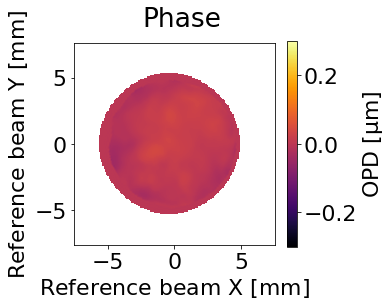

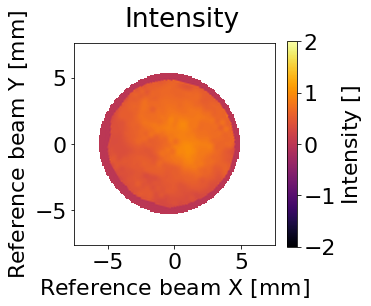

In [4]:
fig_phase_reference, ax_phase_reference = phase_reference.plot2d(clim=.3)
fig_phase_reference.set_size_inches(4,4)
fig_phase_reference.suptitle('Phase')

fig_intensity_reference, ax_intensity_reference = intensity_reference.plot2d(clim=2.0)
fig_intensity_reference.set_size_inches(4,4)
fig_intensity_reference.suptitle('Intensity')


### Calculate summary measures for reference wavefront

In [5]:
rms_reference = np.round(phase_reference.rms,3)
PV_reference = np.round(phase_reference.pv,3)

print('RMS: '+np.str(rms_reference)+' micron\nPV: '+np.str(PV_reference)+' micron')

RMS: 0.015 micron
PV: 0.083 micron


## 0&deg; tilted configuration of full system

### Load 0&deg; tilted pupil data from Shack-Hartmann sensor
A ~10 mm mask is applied to the center of the active aperture and the data is rotated by 15&deg;. This is the size of O3 pupil incident on Shack-Hartmann and rotation of the Shack-Hartmann to the axes.

In [6]:
# load intensity
df_straight = pd.read_csv('WFS_data\wavefront_0deg_oversampled.txt',sep='\t',skiprows=9)
df_straight = df_straight.fillna(0)

exp_pupil_straight = np.zeros([160,160])
exp_pupil_straight[17:143,:] = df_straight.values

image_mask=np.empty([160,160])
image_mask[:]=np.nan
rr, cc = disk([87, 76], 60, shape=[160,160])
image_mask[rr,cc]=1
m = np.ma.masked_where(np.isnan(image_mask),image_mask)
exp_pupil_straight_masked = np.ma.masked_where(np.ma.getmask(m), rotate(exp_pupil_straight.T,15))

x_grid=np.linspace(-80,80,161)*95/1000
y_grid=np.linspace(-80,80,161)*95/1000
label_pack = Labels(xy_base='O3 Pupil', z='OPD')
phase_straight = Pupil(xy_unit='mm', z_unit='micron',x=x_grid, y=y_grid, phase=exp_pupil_straight_masked,labels=label_pack)

# load intensity
df_straight = pd.read_csv('WFS_data\intensity_0deg_oversampled.txt',sep='\t',skiprows=9)
df_straight = df_straight.fillna(0)

exp_intensity_straight = np.zeros([160,160])
exp_intensity_straight[18:142,:] = df_straight.values

image_mask=np.empty([160,160])
image_mask[:]=np.nan
rr, cc = disk([87, 76], 60, shape=[160,160])
image_mask[rr,cc]=1
m = np.ma.masked_where(np.isnan(image_mask),image_mask)
exp_intensity_straight_masked = np.ma.masked_where(np.ma.getmask(m), rotate(exp_intensity_straight.T,15))

x_grid=np.linspace(-80,80,161)*95/1000 #pixel size conversion to mm
y_grid=np.linspace(-80,80,161)*95/1000 #pixel size conversion to mm
label_pack = Labels(xy_base='Reference beam', z='Intensity')
intensity_straight = Pupil(xy_unit='mm', z_unit='dimensionless_unscaled',x=x_grid, y=y_grid, phase=exp_intensity_straight_masked,labels=label_pack)

### Plot 0&deg; tilted pupil phase

Text(0.5, 0.98, 'Intensity')

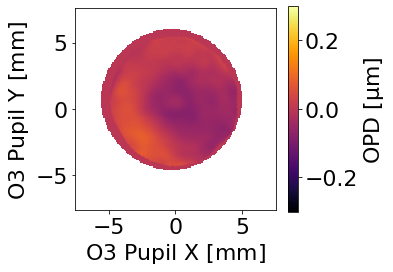

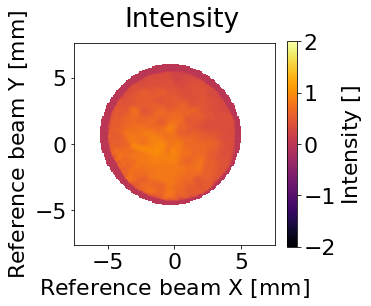

In [7]:
fig_phase_straight, ax_phase_straight = phase_straight.plot2d(clim=.3)
fig_phase_straight.set_size_inches(4,4)
fig_phase_reference.suptitle('Phase')

fig_intensity_straight, ax_intensity_straight = intensity_straight.plot2d(clim=2.0)
fig_intensity_straight.set_size_inches(4,4)
fig_intensity_straight.suptitle('Intensity')

### Calculate summary measures for 0&deg; tilted  pupil

In [8]:
rms_straight = np.round(phase_straight.rms,3)
PV_straight = np.round(phase_straight.pv,3)
strehl_straight = np.round(phase_straight.strehl,2)
print('RMS: '+np.str(rms_straight)+' micron\nPV: '+np.str(PV_straight)+' micron\nStrehl ratio: '+np.str(strehl_straight))

RMS: 0.035 micron
PV: 0.164 micron
Strehl ratio: 0.98


In [9]:
terms_to_fit = np.arange(5,26,1).tolist()
coefficients_straight = zernikefit(phase_straight.phase, terms=terms_to_fit, norm=True, map_='Fringe')
coefficients_straight = np.insert(coefficients_straight,0,[0,0,0,0])
fz_decomp_straight = FringeZernike(coefficients_straight, dia=10, xy_unit='micron', z_unit='micron', norm=True)

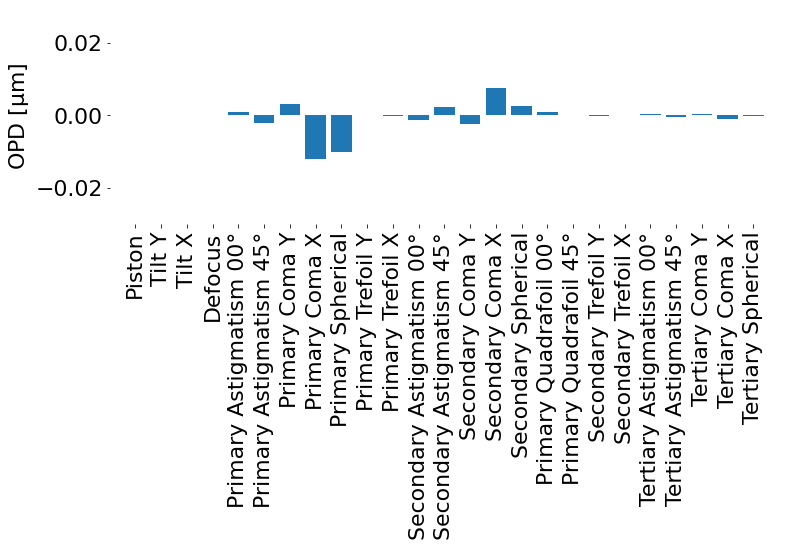

In [10]:
fig_fz_straight, ax_fz_straight = fz_decomp_straight.barplot(orientation='h',number=False)
ax_fz_straight.set_ylim([-.03,.03])
for spine in ax_fz_straight.spines:
    ax_fz_straight.spines[spine].set_visible(False)
fig_fz_straight.set_size_inches(12,4)

## 30&deg; tilted configuration of full system

### Load 30&deg; tilted data from Shack-Hartmann sensor
A ~10 mm mask is applied to the center of the active aperture and the data is rotated by 15&deg;. This is the size of O3 pupil incident on Shack-Hartmann and rotation of the Shack-Hartmann to the axes.

In [11]:
#load phase
df_tilted = pd.read_csv('WFS_data\wavefront_30deg_oversampled.txt',sep='\t',skiprows=9)
df_tilted = df_tilted.fillna(0)

exp_pupil_tilted = np.zeros([160,160])
exp_pupil_tilted[17:143,:] = df_tilted.values

image_mask=np.empty([160,160])
image_mask[:]=np.nan
rr, cc = disk([85, 78], 60, shape=[160,160])
image_mask[rr,cc]=1
m = np.ma.masked_where(np.isnan(image_mask),image_mask)
exp_pupil_tilted_masked = np.ma.masked_where(np.ma.getmask(m), rotate(exp_pupil_tilted.T,15))

x_grid=np.linspace(-80,80,160)*95/1000
y_grid=np.linspace(-80,80,160)*95/1000
label_pack = Labels(xy_base='O3 Pupil', z='OPD')
phase_tilted = Pupil(xy_unit='mm', z_unit='micron',x=x_grid, y=y_grid, phase=exp_pupil_tilted_masked,labels=label_pack)

# load intensity
df_tilted = pd.read_csv('WFS_data\intensity_30deg_oversampled.txt',sep='\t',skiprows=9)
df_tilted = df_tilted.fillna(0)

exp_intensity_tilted = np.zeros([160,160])
exp_intensity_tilted[18:142,:] = df_tilted.values

image_mask=np.empty([160,160])
image_mask[:]=np.nan
rr, cc = disk([85, 78], 60, shape=[160,160])
image_mask[rr,cc]=1
m = np.ma.masked_where(np.isnan(image_mask),image_mask)
exp_intensity_tilted_masked = np.ma.masked_where(np.ma.getmask(m), rotate(exp_intensity_tilted.T,15))

x_grid=np.linspace(-80,80,161)*95/1000 #pixel size conversion to mm
y_grid=np.linspace(-80,80,161)*95/1000 #pixel size conversion to mm
label_pack = Labels(xy_base='Reference beam', z='Intensity')
intensity_tilted = Pupil(xy_unit='mm', z_unit='dimensionless_unscaled',x=x_grid, y=y_grid, phase=exp_intensity_tilted_masked,labels=label_pack)

### Plot 30&deg; tilted pupil phase
Data is cropped to remove areas of Shack-Hartmann that fall outside the center measurement area.

Text(0.5, 0.98, 'Intensity')

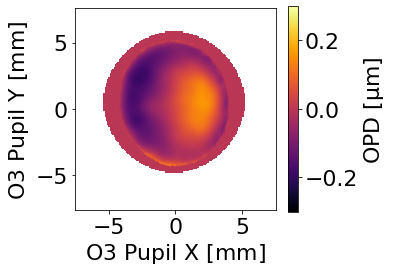

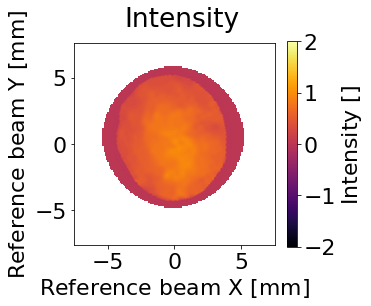

In [12]:
fig_phase_tilted, ax_phase_tilted = phase_tilted.plot2d(clim=.3)
fig_phase_tilted.set_size_inches(4,4)
fig_phase_straight.suptitle('Phase')

fig_intensity_tilted, ax_intensity_tilted = intensity_tilted.plot2d(clim=2.0)
fig_intensity_tilted.set_size_inches(4,4)
fig_intensity_tilted.suptitle('Intensity')

### Calculate summary measures for 30&deg; tilted  pupil

In [13]:
rms_tilted = np.round(phase_tilted.rms,3)
PV_tilted = np.round(phase_tilted.pv,3)
strehl_tilted = np.round(phase_tilted.strehl,2)
print('RMS: '+np.str(rms_tilted)+' micron\nPV: '+np.str(PV_tilted)+' micron\nStrehl ratio: '+np.str(strehl_tilted))

RMS: 0.071 micron
PV: 0.355 micron
Strehl ratio: 0.91


In [14]:
terms_to_fit = np.arange(5,26,1).tolist()
coefficients_tilted = zernikefit(phase_tilted.phase, terms=terms_to_fit, norm=True, map_='Fringe')
coefficients_tilted = np.insert(coefficients_tilted,0,[0,0,0,0])
fz_decomp_tilted = FringeZernike(coefficients_tilted, dia=10, xy_unit='micron', z_unit='micron', norm=True)

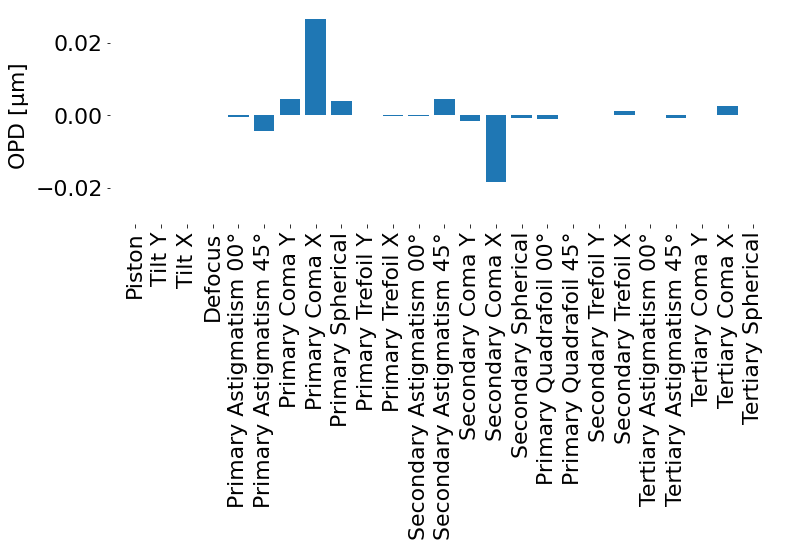

In [15]:
fig_fz_tilt, ax_fz_tilt =fz_decomp_tilted.barplot(orientation='h',number=False)
ax_fz_tilt.set_ylim([-.03,.03])
for spine in ax_fz_tilt.spines:
    ax_fz_tilt.spines[spine].set_visible(False)
fig_fz_tilt.set_size_inches(12,4)

## Geometric calculation for efficiency of pupil measurement

In [16]:
# area of pupil incident on Shack-Hartmann
img = np.zeros((500, 500), dtype=np.uint16)
rr, cc = disk([250,250], 375/2, shape=[500,500])
img[rr, cc] = 2

# area of Shack-Hartmann
img2 = np.zeros((500, 500), dtype=np.uint16)
rr,cc = rectangle([20,70],extent=[460,360])
img2[rr, cc] = 1

# find all pixels where pupil lies outside Shack-Hartmann active aperture
result=np.greater(img,img2)

# calculate percentage of pupil that lies within the Shack-Hartmann active aperture
perct_measured=np.round(100.-np.sum(result)/np.sum(img/2),3)
print('Percentage of O3 pupil incident on rectangular Shack-Hartmann aperture: '+np.str(perct_measured)+'%')

Percentage of O3 pupil incident on rectangular Shack-Hartmann aperture: 99.0%
